# Machine Learn




Permition to use: https://data.lacity.org/Public-Safety/Crime-Data-from-2020-to-Present/2nrs-mtv8


•	DR_NO : Division of Records Number: Official file number made up of a 2 digit year, area ID, and 5 digits

•	Date Rptd : MM/DD/YYYY

•	DATE OCC : MM/DD/YYYY

•	TIME OCC : In 24 hour military time.

•	AREA : The LAPD has 21 Community Police Stations referred to as Geographic Areas within the department. These Geographic Areas are sequentially numbered from 1-21.

•	AREA NAME : The 21 Geographic Areas or Patrol Divisions are also given a name designation that references a landmark or the surrounding community that it is responsible for. For example 77th Street Division is located at the intersection of South Broadway and 77th Street, serving neighborhoods in South Los Angeles.

•	Rpt Dist No : A four-digit code that represents a sub-area within a Geographic Area. All crime records reference the "RD" that it occurred in for statistical comparisons. Find LAPD Reporting Districts on the LA City GeoHub at http://geohub.lacity.org/datasets/c4f83909b81d4786aa8ba8a74a4b4db1_4

•	Part 1-2

•	Crm Cd : Indicates the crime committed. (Same as Crime Code 1)

•	Crm Cd Desc : Defines the Crime Code provided.

•	Mocodes : Modus Operandi: Activities associated with the suspect in commission of the crime.See attached PDF for list of MO Codes in numerical order. https://data.lacity.org/api/views/y8tr-7khq/files/3a967fbd-f210-4857-bc52-60230efe256c?download=true&filename=MO%20CODES%20(numerical%20order).pdf

•	Vict Age : Two character numeric

•	Vict Sex : F - Female M - Male X - Unknown

•	Vict Descent : Descent Code: A - Other Asian B - Black C - Chinese D - Cambodian F - Filipino G - Guamanian H -
Hispanic/Latin/Mexican I - American Indian/Alaskan Native J - Japanese K - Korean L - Laotian O - Other P - Pacific Islander S - Samoan U - Hawaiian V - Vietnamese W - White X - Unknown Z - Asian Indian

•	Premis Cd : The type of structure, vehicle, or location where the crime took place.

•	Premis Desc : Defines the Premise Code provided.

•	Weapon Used Cd : The type of weapon used in the crime.

•	Weapon Desc : Defines the Weapon Used Code provided.

•	Status : Status of the case. (IC is the default)

•	Status Desc : Defines the Status Code provided.

•	Crm Cd 1 : Indicates the crime committed. Crime Code 1 is the primary and most serious one. Crime Code 2, 3, and 4 are respectively less serious offenses. Lower crime class numbers are more serious.

•	Crm Cd 2 : May contain a code for an additional crime, less serious than Crime Code 1.

•	Crm Cd 3 : May contain a code for an additional crime, less serious than Crime Code 1.

•	Crm Cd 4 : May contain a code for an additional crime, less serious than Crime Code 1
.
•	LOCATION : Street address of crime incident rounded to the nearest hundred block to maintain anonymity.

•	Cross Street : Cross Street of rounded Address

•	LAT : Latitude

•	LON : Longtitude


# Discovery the Data

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
crime_df = pd.read_csv('crime_data.csv')

In [3]:
crime_df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,200110444,04/14/2020 12:00:00 AM,02/13/2020 12:00:00 AM,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,AA,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474
3,191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,191921269,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468


In [4]:
crime_df.describe()

,DR_NO,TIME OCC,AREA,Rpt Dist No,Part 1-2,Crm Cd,Vict Age,Premis Cd,Weapon Used Cd,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LAT,LON
count,6.949150e+05,694915.000000,694915.000000,694915.000000,694915.000000,694915.000000,694915.000000,694907.000000,241434.000000,694906.000000,51816.000000,1747.000000,52.000000,694915.000000,694915.000000
mean,2.134252e+08,1333.809936,10.712713,1117.650033,1.415976,500.592415,29.969890,305.024871,362.202080,500.332790,956.742782,982.900401,990.615385,33.962489,-117.968027
std,9.519111e+06,654.271226,6.089274,608.929482,0.492890,207.846384,21.689495,216.431529,123.804416,207.636381,112.844364,57.146206,29.227407,1.945728,6.748226
min,8.170000e+02,1.000000,1.000000,101.000000,1.000000,110.000000,-2.000000,101.000000,101.000000,110.000000,121.000000,9.000000,821.000000,0.000000,-118.667600
25%,2.019173e+08,900.000000,6.000000,622.000000,1.000000,330.000000,12.000000,101.000000,308.000000,330.000000,998.000000,998.000000,998.000000,34.013200,-118.429400
50%,2.116044e+08,1413.000000,11.000000,1141.000000,1.000000,442.000000,31.000000,203.000000,400.000000,442.000000,998.000000,998.000000,998.000000,34.058400,-118.321400
75%,2.211135e+08,1900.000000,16.000000,1617.000000,2.000000,626.000000,45.000000,501.000000,400.000000,626.000000,998.000000,998.000000,998.000000,34.163100,-118.273900
max,2.399097e+08,2359.000000,21.000000,2199.000000,2.000000,956.000000,120.000000,971.000000,516.000000,956.000000,999.000000,999.000000,999.000000,34.334300,0.000000


In [5]:
crime_df.shape

(694915, 28)

In [6]:
crime_df.isnull().sum()

DR_NO                  0
Date Rptd              0
DATE OCC               0
TIME OCC               0
AREA                   0
AREA NAME              0
Rpt Dist No            0
Part 1-2               0
Crm Cd                 0
Crm Cd Desc            0
Mocodes            95563
Vict Age               0
Vict Sex           91046
Vict Descent       91052
Premis Cd              8
Premis Desc          366
Weapon Used Cd    453481
Weapon Desc       453481
Status                 0
Status Desc            0
Crm Cd 1               9
Crm Cd 2          643099
Crm Cd 3          693168
Crm Cd 4          694863
LOCATION               0
Cross Street      582058
LAT                    0
LON                    0
dtype: int64

In [7]:
crime_df

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,200110444,04/14/2020 12:00:00 AM,02/13/2020 12:00:00 AM,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,AA,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474
3,191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,191921269,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
694910,230804266,01/08/2023 12:00:00 AM,01/08/2023 12:00:00 AM,1030,8,West LA,839,1,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",...,IC,Invest Cont,341.0,NaN,NaN,NaN,10200 SANTA MONICA BL,NaN,34.0611,-118.4184
694911,230109201,03/23/2023 12:00:00 AM,03/22/2023 12:00:00 AM,1830,1,Central,111,1,440,THEFT PLAIN - PETTY ($950 & UNDER),...,IC,Invest Cont,440.0,NaN,NaN,NaN,700 W CESAR E CHAVEZ AV,NaN,34.0606,-118.2439
694912,231604807,01/27/2023 12:00:00 AM,01/26/2023 12:00:00 AM,1800,16,Foothill,1663,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,12500 BRANFORD ST,NaN,34.2466,-118.4054
694913,231606525,03/22/2023 12:00:00 AM,03/22/2023 12:00:00 AM,1000,16,Foothill,1602,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,IC,Invest Cont,230.0,NaN,NaN,NaN,12800 FILMORE ST,NaN,34.2790,-118.4116


In [8]:
crime_df.isnull().mean() * 100

DR_NO              0.000000
Date Rptd          0.000000
DATE OCC           0.000000
TIME OCC           0.000000
AREA               0.000000
AREA NAME          0.000000
Rpt Dist No        0.000000
Part 1-2           0.000000
Crm Cd             0.000000
Crm Cd Desc        0.000000
Mocodes           13.751754
Vict Age           0.000000
Vict Sex          13.101746
Vict Descent      13.102610
Premis Cd          0.001151
Premis Desc        0.052668
Weapon Used Cd    65.257046
Weapon Desc       65.257046
Status             0.000000
Status Desc        0.000000
Crm Cd 1           0.001295
Crm Cd 2          92.543548
Crm Cd 3          99.748602
Crm Cd 4          99.992517
LOCATION           0.000000
Cross Street      83.759596
LAT                0.000000
LON                0.000000
dtype: float64

In [9]:
# As we can see it there are some columns which has 92%, 99.74, 99.99 of missing values, It means that we don't need these
# to be able to continue all the process, what I am going to do is drop these colums and verify the columns which has 60% or 80%
# Before I drop the columns the be able to visualize it better, I will plot the missing values too see it what we are dealing with. 

In [10]:
#pip install missingno

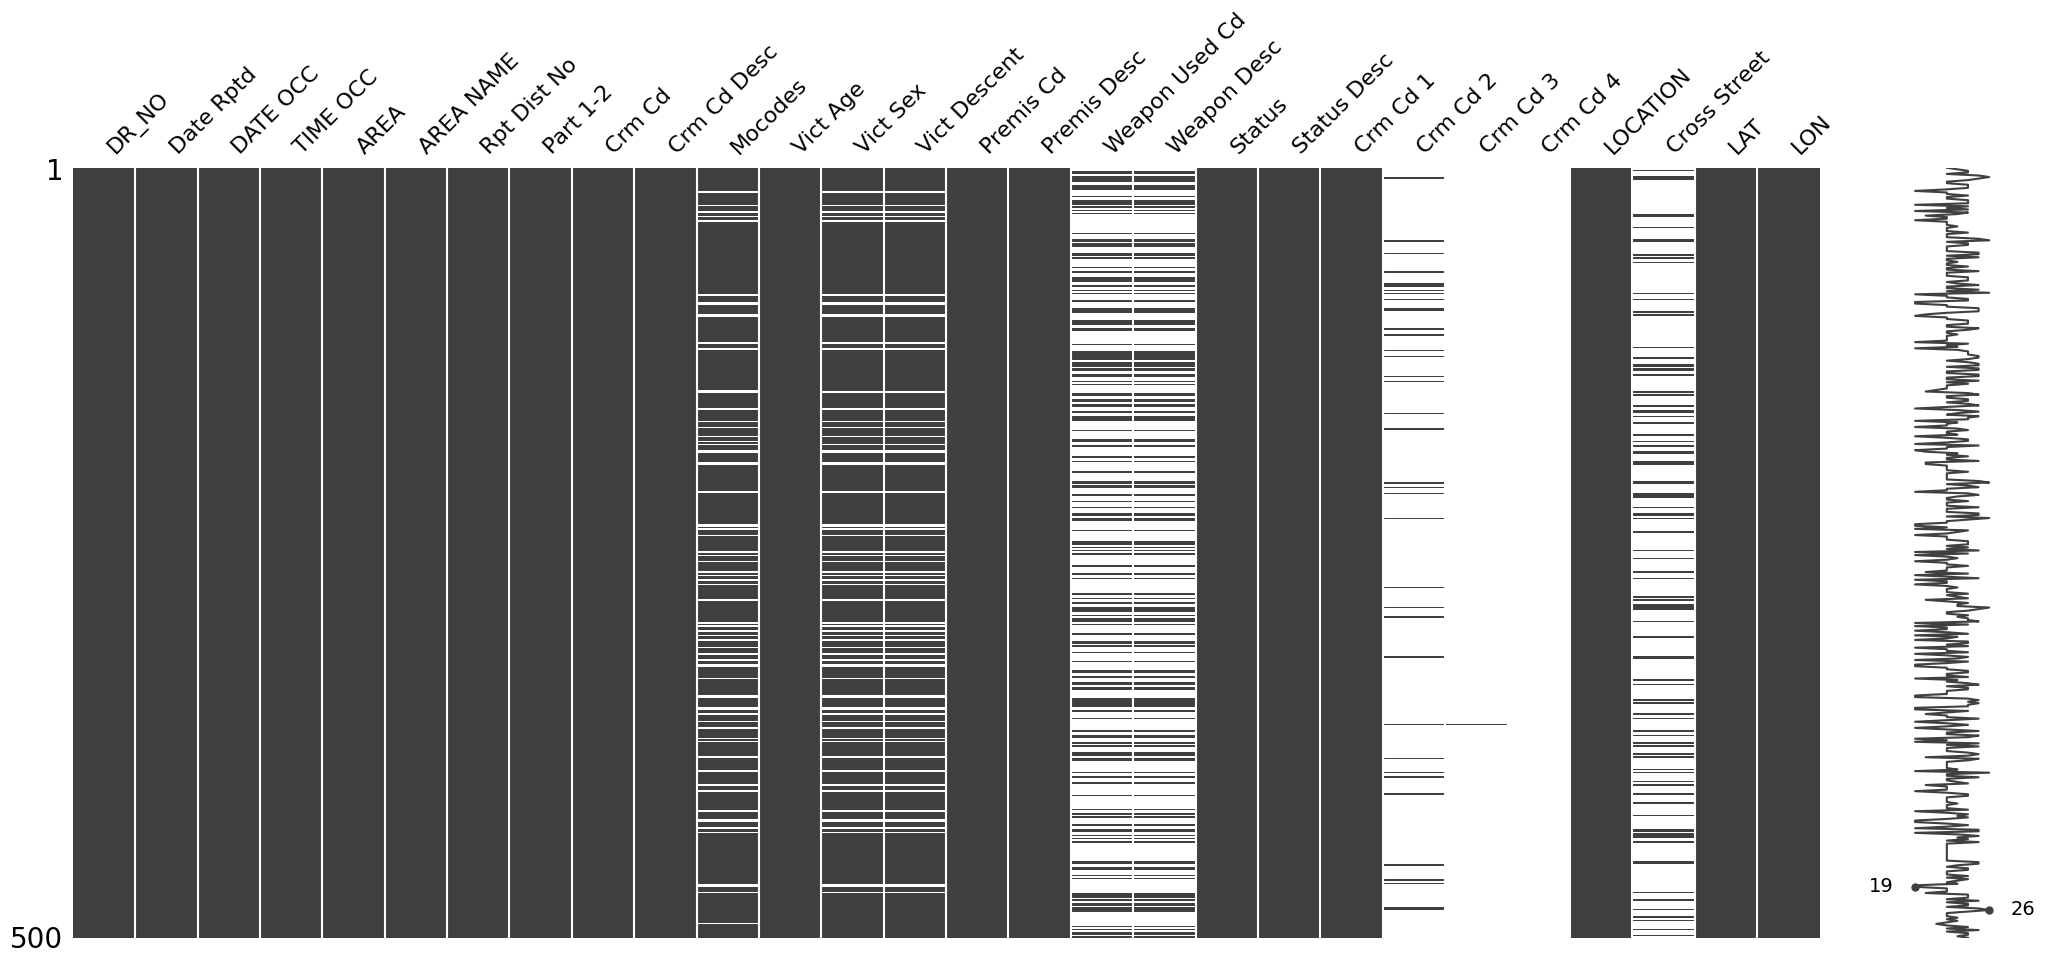

In [11]:
import missingno as msno

ax = msno.matrix(crime_df.sample(500))
#I plot a sample of 500 due to if I get more this graph could be too heavy. 

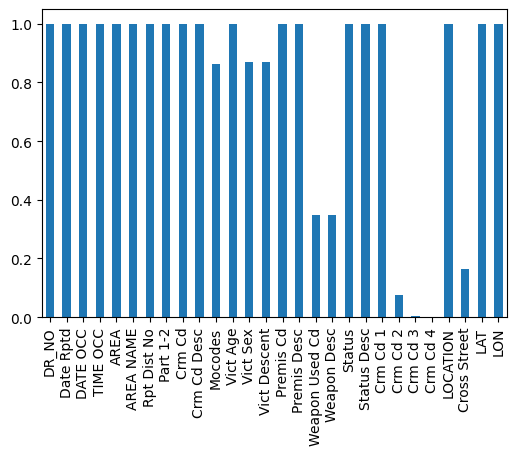

In [12]:
#https://matplotlib.org/2.0.2/examples/color/colormaps_reference.html
fig, ax = plt.subplots(figsize=(6, 4))
(1 - crime_df.isnull().mean()).abs().plot.bar(ax=ax, colormap='tab10');

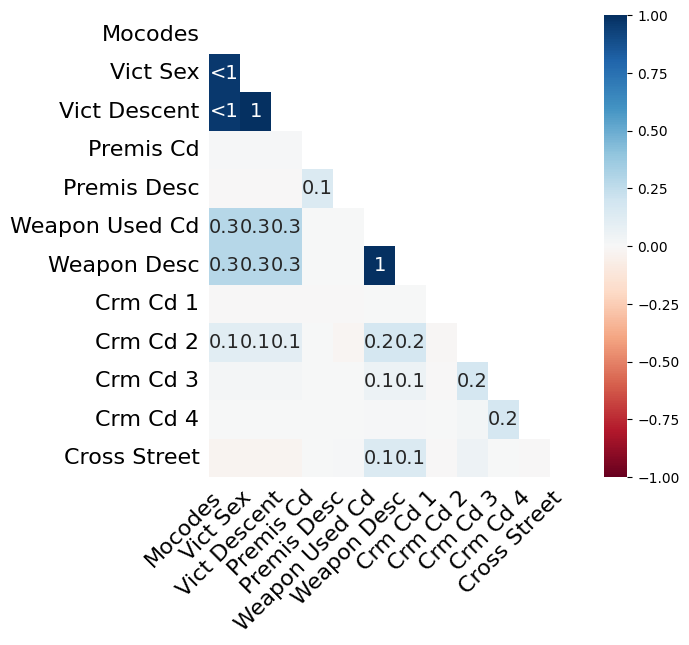

In [13]:
ax = msno.heatmap(crime_df, figsize=(6, 6))

In [14]:
crime_df.columns = crime_df.columns.str.replace(' ', '_')

In [15]:
crime_df.head()

,DR_NO,Date_Rptd,DATE_OCC,TIME_OCC,AREA,AREA_NAME,Rpt_Dist_No,Part_1-2,Crm_Cd,Crm_Cd_Desc,...,Status,Status_Desc,Crm_Cd_1,Crm_Cd_2,Crm_Cd_3,Crm_Cd_4,LOCATION,Cross_Street,LAT,LON
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,200110444,04/14/2020 12:00:00 AM,02/13/2020 12:00:00 AM,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,AA,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474
3,191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,191921269,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468


In [16]:
crime_df.drop(columns= ['Crm_Cd_2', 'Crm_Cd_3', 'Crm_Cd_4'], inplace=True)

# Selecting features and Applying EDA. 

    In order to be able to answer to the questions:
    Who is more likely to commit a crime? 
    Which mounth is more likely to happen a crime? 
    Where is consider more dangerous? 
    
    I will select some features that is important to analyse and answer these questions: 
    
       I have a data when occur the crime and the time (Explain the I use a process to create a new column with the mounth. 
       I also need to explain why these columns are important for my analysis. 

In [17]:
crime_df.drop(columns=['DR_NO', 'Date_Rptd','LAT', 'LON', 'Status_Desc', 'Part_1-2'], inplace=True)

In [18]:
crime_df.head()

,DATE_OCC,TIME_OCC,AREA,AREA_NAME,Rpt_Dist_No,Crm_Cd,Crm_Cd_Desc,Mocodes,Vict_Age,Vict_Sex,Vict_Descent,Premis_Cd,Premis_Desc,Weapon_Used_Cd,Weapon_Desc,Status,Crm_Cd_1,LOCATION,Cross_Street
0,01/08/2020 12:00:00 AM,2230,3,Southwest,377,624,BATTERY - SIMPLE ASSAULT,0444 0913,36,F,B,501.0,SINGLE FAMILY DWELLING,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,624.0,1100 W 39TH PL,NaN
1,01/01/2020 12:00:00 AM,330,1,Central,163,624,BATTERY - SIMPLE ASSAULT,0416 1822 1414,25,M,H,102.0,SIDEWALK,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,624.0,700 S HILL ST,NaN
2,02/13/2020 12:00:00 AM,1200,1,Central,155,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,1501,0,X,X,726.0,POLICE FACILITY,NaN,NaN,AA,845.0,200 E 6TH ST,NaN
3,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329 1402,76,F,W,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,IC,745.0,5400 CORTEEN PL,NaN
4,01/01/2020 12:00:00 AM,415,19,Mission,1998,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0329,31,X,X,409.0,BEAUTY SUPPLY STORE,NaN,NaN,IC,740.0,14400 TITUS ST,NaN


In [19]:
crime_df['DATE_OCC'] = pd.to_datetime(crime_df['DATE_OCC'], format='%m/%d/%Y %I:%M:%S %p')


In [20]:
crime_df['month'] = crime_df['DATE_OCC'].dt.month

# Creating Features
### Cleaning the data

    I am creating new features due to I do not think I can use the feature DATE_OCC set up like 2020-01-08, What I did was: 
    1 ) I created a new feature call month which I can see it which month happen the crime. 
    2 ) I created another one call year which I will be able to see if it happens 2020 or 2021 and so on... 
    

In [21]:
crime_df['year'] = crime_df['DATE_OCC'].dt.year

In [22]:
crime_df.head()

,DATE_OCC,TIME_OCC,AREA,AREA_NAME,Rpt_Dist_No,Crm_Cd,Crm_Cd_Desc,Mocodes,Vict_Age,Vict_Sex,...,Premis_Cd,Premis_Desc,Weapon_Used_Cd,Weapon_Desc,Status,Crm_Cd_1,LOCATION,Cross_Street,month,year
0,2020-01-08,2230,3,Southwest,377,624,BATTERY - SIMPLE ASSAULT,0444 0913,36,F,...,501.0,SINGLE FAMILY DWELLING,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,624.0,1100 W 39TH PL,NaN,1,2020
1,2020-01-01,330,1,Central,163,624,BATTERY - SIMPLE ASSAULT,0416 1822 1414,25,M,...,102.0,SIDEWALK,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,624.0,700 S HILL ST,NaN,1,2020
2,2020-02-13,1200,1,Central,155,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,1501,0,X,...,726.0,POLICE FACILITY,NaN,NaN,AA,845.0,200 E 6TH ST,NaN,2,2020
3,2020-01-01,1730,15,N Hollywood,1543,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329 1402,76,F,...,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,IC,745.0,5400 CORTEEN PL,NaN,1,2020
4,2020-01-01,415,19,Mission,1998,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0329,31,X,...,409.0,BEAUTY SUPPLY STORE,NaN,NaN,IC,740.0,14400 TITUS ST,NaN,1,2020


In [23]:
crime_df.isnull().mean() * 100

DATE_OCC           0.000000
TIME_OCC           0.000000
AREA               0.000000
AREA_NAME          0.000000
Rpt_Dist_No        0.000000
Crm_Cd             0.000000
Crm_Cd_Desc        0.000000
Mocodes           13.751754
Vict_Age           0.000000
Vict_Sex          13.101746
Vict_Descent      13.102610
Premis_Cd          0.001151
Premis_Desc        0.052668
Weapon_Used_Cd    65.257046
Weapon_Desc       65.257046
Status             0.000000
Crm_Cd_1           0.001295
LOCATION           0.000000
Cross_Street      83.759596
month              0.000000
year               0.000000
dtype: float64

In [24]:
# As we can see there are 80% of missing values, for what we are looking for this feature is not important, so Im going to drop it. 
# mocodes are also not interested for our analyze. 

crime_df.drop(columns=['Mocodes', 'Cross_Street', 'Crm_Cd_Desc', 'DATE_OCC', 'Premis_Desc', 
                       'LOCATION', 'AREA_NAME', 'Weapon_Desc', 'Status' ], inplace=True)


In [25]:
crime_df.isnull().mean() * 100

TIME_OCC           0.000000
AREA               0.000000
Rpt_Dist_No        0.000000
Crm_Cd             0.000000
Vict_Age           0.000000
Vict_Sex          13.101746
Vict_Descent      13.102610
Premis_Cd          0.001151
Weapon_Used_Cd    65.257046
Crm_Cd_1           0.001295
month              0.000000
year               0.000000
dtype: float64

In [26]:
crime_df.Vict_Sex.value_counts(dropna=False)

Vict_Sex
M      288736
F      257175
NaN     91046
X       57877
H          81
Name: count, dtype: int64

In [27]:
crime_df.Vict_Sex.describe()

count     603869
unique         4
top            M
freq      288736
Name: Vict_Sex, dtype: object

In [28]:
crime_df['Vict_Sex'].isnull().sum()

91046

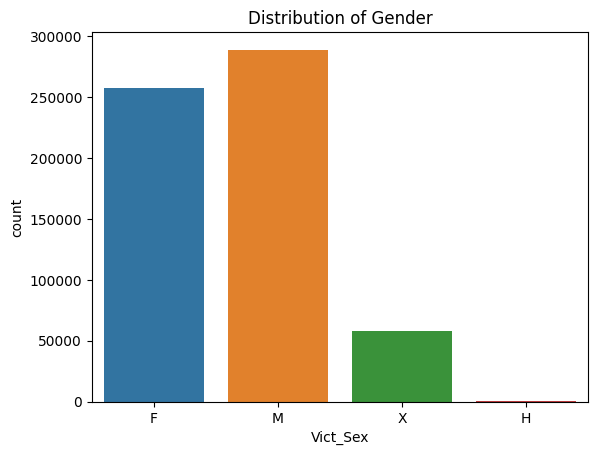

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.countplot(x='Vict_Sex', data=crime_df)
plt.title('Distribution of Gender')
plt.show()



# Plotting this column we can observate that we have more than 250.000 male that commited a crime: Explain a little be more about it. 


In [30]:
print(crime_df['Vict_Sex'].value_counts(normalize=True) * 100)


Vict_Sex
M    47.814344
F    42.587879
X     9.584363
H     0.013414
Name: proportion, dtype: float64


In [31]:
# I had to get this code, to change my H and NaN for Unknow. 
def gender_values(data):
    new_gender = []
    for gen in data["Vict_Sex"]:
        if gen == "M":
            new_gender.append(0)
        elif gen == "F":
            new_gender.append(1)
        else:
            new_gender.append(2)
    return new_gender

In [32]:
new_gender = gender_values(data=crime_df)
crime_df["Vict_Gender"] = new_gender
crime_df.head()

,TIME_OCC,AREA,Rpt_Dist_No,Crm_Cd,Vict_Age,Vict_Sex,Vict_Descent,Premis_Cd,Weapon_Used_Cd,Crm_Cd_1,month,year,Vict_Gender
0,2230,3,377,624,36,F,B,501.0,400.0,624.0,1,2020,1
1,330,1,163,624,25,M,H,102.0,500.0,624.0,1,2020,0
2,1200,1,155,845,0,X,X,726.0,NaN,845.0,2,2020,2
3,1730,15,1543,745,76,F,W,502.0,NaN,745.0,1,2020,1
4,415,19,1998,740,31,X,X,409.0,NaN,740.0,1,2020,2


In [33]:
crime_df.Vict_Gender.value_counts(dropna=False)

Vict_Gender
0    288736
1    257175
2    149004
Name: count, dtype: int64

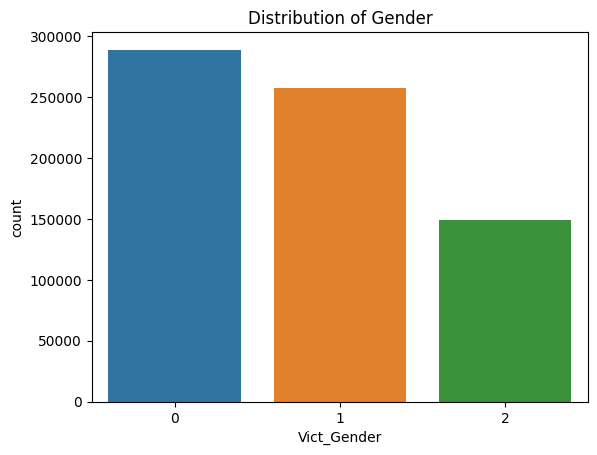

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.countplot(x='Vict_Gender', data=crime_df)
plt.title('Distribution of Gender')
plt.show()

# In this plot we can see the distribution of our feature Vict_gender 

In [35]:
# Column fix it. 
# Now I can drop the colum Vict_sex. 


In [36]:
crime_df.drop(columns=['Vict_Sex'], inplace=True)


In [37]:
crime_df.head()

,TIME_OCC,AREA,Rpt_Dist_No,Crm_Cd,Vict_Age,Vict_Descent,Premis_Cd,Weapon_Used_Cd,Crm_Cd_1,month,year,Vict_Gender
0,2230,3,377,624,36,B,501.0,400.0,624.0,1,2020,1
1,330,1,163,624,25,H,102.0,500.0,624.0,1,2020,0
2,1200,1,155,845,0,X,726.0,NaN,845.0,2,2020,2
3,1730,15,1543,745,76,W,502.0,NaN,745.0,1,2020,1
4,415,19,1998,740,31,X,409.0,NaN,740.0,1,2020,2


In [38]:
crime_df.Vict_Descent.value_counts(dropna=False)

Vict_Descent
H      213713
W      143158
B      100322
NaN     91052
X       64399
O       54984
A       15125
K        3630
F        2853
C        2542
J         958
V         684
I         666
Z         335
P         182
U         134
G          48
D          48
L          44
S          38
Name: count, dtype: int64

In [39]:
crime_df['Vict Descent'] = crime_df['Vict_Descent'].replace(np.nan, 'X', inplace=True)

In [40]:
crime_df.Vict_Descent.value_counts(dropna=False)

Vict_Descent
H    213713
X    155451
W    143158
B    100322
O     54984
A     15125
K      3630
F      2853
C      2542
J       958
V       684
I       666
Z       335
P       182
U       134
G        48
D        48
L        44
S        38
Name: count, dtype: int64

In [41]:
# I used LabelEncoder to be able to change the strings to numeric to be able to use my model to my Machine Learn. 

In [42]:
from sklearn.preprocessing import LabelEncoder

In [43]:
le = LabelEncoder()
crime_df['Vict_descent_1'] = le.fit_transform(crime_df['Vict_Descent'])

In [44]:
crime_df.Vict_descent_1.value_counts(dropna=False)

Vict_descent_1
6     213713
17    155451
16    143158
1     100322
11     54984
0      15125
9       3630
4       2853
2       2542
8        958
15       684
7        666
18       335
12       182
14       134
5         48
3         48
10        44
13        38
Name: count, dtype: int64

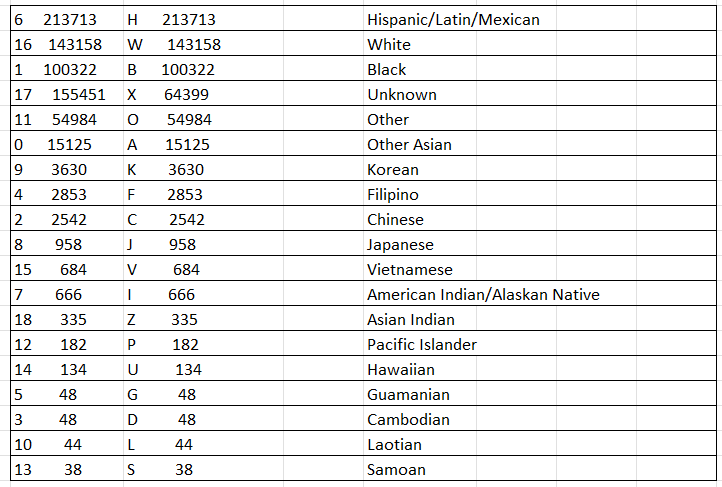

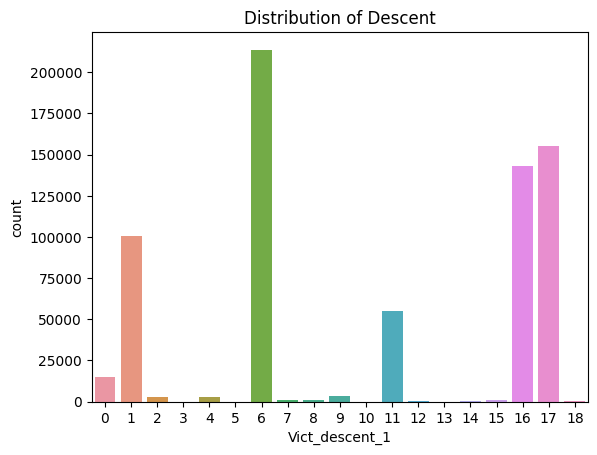

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.countplot(x='Vict_descent_1', data=crime_df)
plt.title('Distribution of Descent')
plt.show()

# In this plot we can see the distribution of our feature Vict_descent_1

In [46]:
#https://seaborn.pydata.org/examples/part_whole_bars.html I MIGHT USE THIS GRAPH. 

In [47]:
crime_df.drop(columns=['Vict_Descent','Vict Descent' ], inplace=True)


In [48]:
crime_df.isnull().mean() *100 

TIME_OCC           0.000000
AREA               0.000000
Rpt_Dist_No        0.000000
Crm_Cd             0.000000
Vict_Age           0.000000
Premis_Cd          0.001151
Weapon_Used_Cd    65.257046
Crm_Cd_1           0.001295
month              0.000000
year               0.000000
Vict_Gender        0.000000
Vict_descent_1     0.000000
dtype: float64

<Axes: ylabel='Density'>

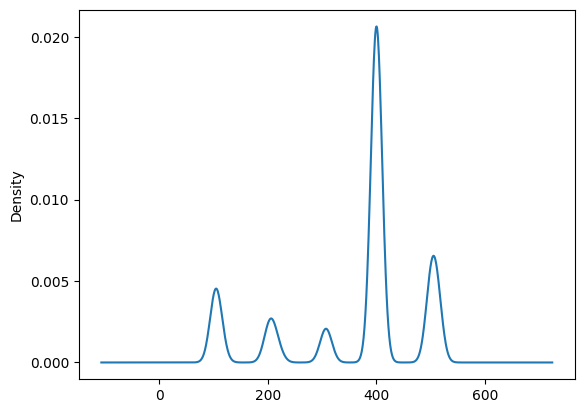

In [49]:
crime_df['Weapon_Used_Cd'].plot(kind = 'density')

In [50]:
mean = crime_df['Weapon_Used_Cd'].mean()

In [51]:
crime_df['Weapon_Used_Cd'].fillna(mean , inplace=True)

# Plot the density of the feature 'Weapon_used_cd'.

<Axes: ylabel='Density'>

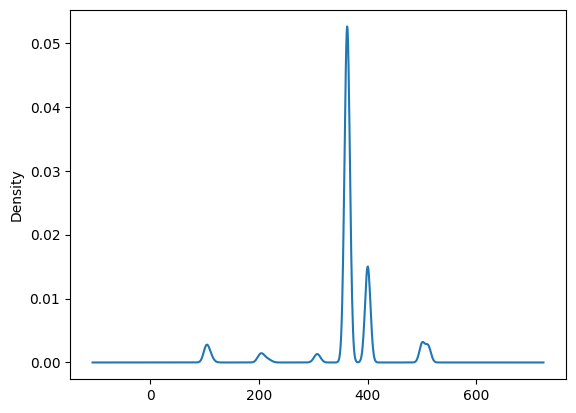

In [52]:
crime_df['Weapon_Used_Cd'].plot(kind = 'density')

In [53]:
crime_df.isnull().mean() *100 

TIME_OCC          0.000000
AREA              0.000000
Rpt_Dist_No       0.000000
Crm_Cd            0.000000
Vict_Age          0.000000
Premis_Cd         0.001151
Weapon_Used_Cd    0.000000
Crm_Cd_1          0.001295
month             0.000000
year              0.000000
Vict_Gender       0.000000
Vict_descent_1    0.000000
dtype: float64

<Axes: ylabel='Density'>

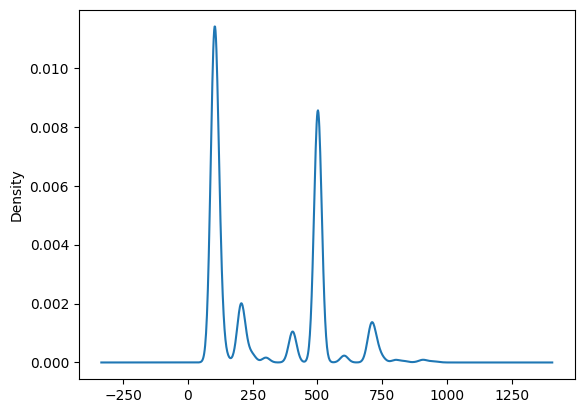

In [54]:
crime_df['Premis_Cd'].plot(kind = 'density')

In [55]:
meancd = crime_df['Premis_Cd'].mean()

In [56]:
crime_df['Premis_Cd'].fillna(meancd, inplace=True)

In [57]:
mean1 = crime_df['Crm_Cd_1'].mean()

In [58]:
crime_df['Crm_Cd_1'].fillna(mean1, inplace= True)

In [59]:
crime_df.head()

,TIME_OCC,AREA,Rpt_Dist_No,Crm_Cd,Vict_Age,Premis_Cd,Weapon_Used_Cd,Crm_Cd_1,month,year,Vict_Gender,Vict_descent_1
0,2230,3,377,624,36,501.0,400.00000,624.0,1,2020,1,1
1,330,1,163,624,25,102.0,500.00000,624.0,1,2020,0,6
2,1200,1,155,845,0,726.0,362.20208,845.0,2,2020,2,17
3,1730,15,1543,745,76,502.0,362.20208,745.0,1,2020,1,16
4,415,19,1998,740,31,409.0,362.20208,740.0,1,2020,2,17


# Observation about clean the data


    One of the things that I realized about this dataset was the possibility to change my target depending of the question that I am doing. 
    Example: 
    The first question that I have is: What is the average age? 
    
    

In [60]:
crime_df['Vict_Age'].replace({0: np.nan, -1: np.nan, -2: np.nan, 120: np.nan}, inplace=True)



In [61]:
crime_df.Vict_Age.value_counts(dropna=False)

Vict_Age
NaN     168549
30.0     16076
35.0     15665
31.0     15289
29.0     15288
         ...  
94.0        81
95.0        71
96.0        66
97.0        53
98.0        51
Name: count, Length: 99, dtype: int64

In [62]:
# There are 168.549 missing values, because, above I had to replace -1 and -2 and 120 that before was in our dataset and are
# Data that makes no sense due to we are talking about people that commited a crime. 

In [63]:
crime_df['Vict_Age'].isnull().sum()

168549

In [64]:
mean4 = crime_df['Vict_Age'].mean()

In [65]:
crime_df['Vict_Age'] = crime_df['Vict_Age'].fillna(mean4)


In [66]:
crime_df.Vict_Age.value_counts(dropna=False)

Vict_Age
39.56648    168549
30.00000     16076
35.00000     15665
31.00000     15289
29.00000     15288
             ...  
94.00000        81
95.00000        71
96.00000        66
97.00000        53
98.00000        51
Name: count, Length: 99, dtype: int64

# Visualizing the data
 #### Explain a little bit better. 

In [67]:
sns.boxplot(x='Vict_descent_1', y='Vict_Age', data=)
plt.title('Box plot of Age by Race')
plt.xlabel('Vict_descent_1')
plt.ylabel('Vict_Age')
plt.show()

SyntaxError: invalid syntax (1456720079.py, line 1)

In [ ]:
sns.barplot(x='Vict_descent_1', y='Vict_Age', data=crime_df, estimator=np.mean)
plt.title('Average Age by Race')
plt.xlabel('Vict_descent_1')
plt.ylabel('Average Vict_Age')
plt.show()

In [ ]:
# EXPLAIN ABOUT IT. 

In [ ]:
sns.pairplot(crime_df)

# StandardScaller

In [ ]:
df_target = crime_df[['Vict_Gender']]


# PCA

In [ ]:
from sklearn.decomposition import PCA 

In [ ]:
pca = PCA().fit(X) 
plt.plot(np.cumsum(pca.explained_variance_ratio_)) 
plt.xlabel('number of components') 
plt.ylabel('cumulative explained variance'); 

In [ ]:
pca = PCA(n_components=4) 
pca.fit(X) 
X_pca = pca.transform(X)
print("original shape:   ", X.shape) 
print("transformed shape:", X_pca.shape) 


In [ ]:
# I know to be able to get almost 100% of accuracy I have to use 4 components. 

In [ ]:
crime_pca = pd.DataFrame(X, columns =['A1', 'A2', 'A3', 'A4'])

In [ ]:
crime_pca.head()